In [45]:
# Image recognitioon code using machine learning
# Compares svm 1 vs 1 and 1 vs all
# and CNN with and without regularization and dropout

In [45]:
import numpy as np
from matplotlib import pyplot as plt
import array as arr
import copy
from PIL import Image
from sklearn import svm
import statistics
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from keras.layers import Dropout

In [2]:
# Subroutine to visualize a data point
def plot_im(im, i):
    #print(im)
    #print(len(im))
    im = np.reshape(im[:], (16,16))
    plt.imshow(im[:][:], cmap='gray')
    plt.show()
    print('The number is', i)

In [3]:
# Take data based on numbers that you want to compare
def arrange(data,i,j,ranges):
    # Diffferent case for this index
    # Comparing two numbers
    if i == 0:
        inp = data[0:ranges[0],:]
        inp = np.concatenate([inp,data[ranges[j-1]:ranges[j],:]],axis=0)
    # Diffferent case for this index
    # Comparing two numbers
    elif j == 0:
        inp = data[ranges[i-1]:ranges[i],:]
        inp = np.concatenate([inp,data[0:ranges[0],:]],axis=0) 
    # Case comparing one number vs all
    elif j ==-1:
        inp = copy.deepcopy(data)
        for k in range(ranges[9]):
            if inp[k,0] != i:
                inp[k,0] = -1
    else:
        inp = data[ranges[i-1]:ranges[i],:]
        inp = np.concatenate([inp,data[ranges[j-1]:ranges[j],:]],axis=0)
    return inp

In [4]:
# Read training data

# Initialize three lists
list1 = []
list2 = []
list3 = []

# Read in the test data line by line
with open("zip.train","r") as f:
    list1  = f.readlines()

# Delineate the numbers in each line
for i in list1:
    list2.append(i.split(" "))

# Get the number of data points and their dimensions
col = len(list2[0][:]) - 1
row = len(list2)
print('The number of data points for training is', row)

# Cast the entries in the list from strings to floats
for i in range(row):
    for j in range(col):
        list2[i][j] = float(list2[i][j].strip())

# Store the number of data points for each number under count
count = np.zeros(10)
count = count.astype(int)
for i in range(10):
    for j in range(row):
        if list2[j][0] == i:
            count[i] = count[i]+1
            list3.append(list2[j][0:257])

# Store the index of where the data changes between numbers in the zipcode
temp = 0
ranges = np.zeros(10)
ranges = ranges.astype(int)
ranges[0] = count[0]
for i in range(1,10):
    temp = temp+count[i]   
    ranges[i] = ranges[i-1] + count[i]

# Cast data from a list to an array for training data
data = np.array(list3)

The number of data points for training is 7291


In [5]:
# Read testing data

# Declare 3 lists
train1 = []
train2 = []
train3 = []

# Read in the testing data line by line
with open("zip.test","r") as f:
    train1  = f.readlines()

# Delete any unwanted characters/whitespace
train1 = map(str.strip, train1)
train1 = map(str.rstrip, train1)

# Delineate the numbers in each line
for i in train1:
    train2.append(i.split(" "))

# Get the number of data points and their dimensions
colt = len(train2[0][:])
rowt = len(train2)
print('The number of data points for testing is', rowt)

# Cast the entries in the list from strings to floats
for i in range(rowt):
    for j in range(colt):
        train2[i][j] = float(train2[i][j].strip())
        
# Store the number of data points for each number under count
countt = np.zeros(10)
countt = countt.astype(int)
for i in range(10):
    for j in range(rowt):
        if train2[j][0] == i:
            countt[i] = countt[i]+1
            train3.append(train2[j][0:257])
            
# Store the index of where the data changes between numbers in the zipcode
temp = 0
rangest = np.zeros(10)
rangest = rangest.astype(int)
rangest[0] = countt[0]
for i in range(1,10):
    temp = temp+countt[i]   
    rangest[i] = rangest[i-1] + countt[i]


# Cast data from a list to an array for testing data
datat = np.array(train3)

The number of data points for testing is 2007


median correct percentage for kernel linear =  98.51632047477746
mean correct percentage for kernel linear =  97.96213171264057
median correct percentage for kernel poly =  98.7878787878788
mean correct percentage for kernel poly =  98.60260336452426
median correct percentage for kernel rbf =  98.78345498783455
mean correct percentage for kernel rbf =  98.47317980882858
median correct percentage for kernel sigmoid =  98.08306709265176
mean correct percentage for kernel sigmoid =  97.77953018856601


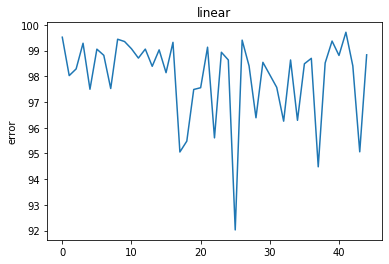

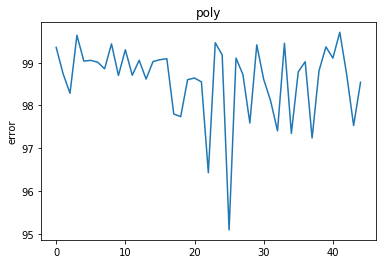

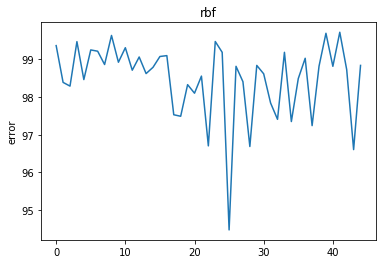

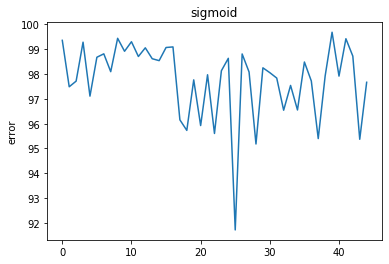

In [6]:
# Train and predict images by comparing the images one on one

# Decalre a dictionary to store the error data for 1 vs 1
err_dat = {}
err_dat['linear'] = []
err_dat['poly'] = []
err_dat['rbf'] = []
err_dat['sigmoid'] = []

# Run SVM for all 1 vs 1
for i in range(10):
    for j in range(i,10):
        if i != j:
            num1 = i
            num2 = j
            # Call to only include data based on numbers that you want to compare
            inp = arrange(data,num1,num2,ranges) # training data
            inpt = arrange(datat,num1,num2,rangest) # test data
            for ker in ('linear', 'poly', 'rbf', 'sigmoid'):
                # Train data set
                clf = svm.SVC(kernel=ker, gamma='auto')
                clf.fit(inp[:,1:257],inp[:,0])

                # Predict training data
                rslt = clf.predict(inpt[:,1:257])

                # Compute Error
                err = 0
                for k in range(len(rslt)):
                    # check if prediction is correct
                    if inpt[k,0] == rslt[k]:
                        err = err + 1
                err = err/len(rslt)*100
                err_dat[ker].append(err)

for ker in ('linear', 'poly', 'rbf', 'sigmoid'):
    print("median correct percentage for kernel " + ker + " = ", statistics.median(err_dat[ker]))
    print("mean correct percentage for kernel " + ker + " = ", statistics.mean(err_dat[ker]))

# Plot errorrs for 1v1 comparison
for ker in ('linear', 'poly', 'rbf', 'sigmoid'):
    plt.plot(err_dat[ker])
    plt.title(ker)
    plt.ylabel('error')
    plt.show()

median correct percentage for kernel linear =  98.51632047477746
mean correct percentage for kernel linear =  97.96213171264057
median correct percentage for kernel poly =  98.7878787878788
mean correct percentage for kernel poly =  98.60260336452426
median correct percentage for kernel rbf =  98.78345498783455
mean correct percentage for kernel rbf =  98.47317980882858
median correct percentage for kernel sigmoid =  98.08306709265176
mean correct percentage for kernel sigmoid =  97.77953018856601


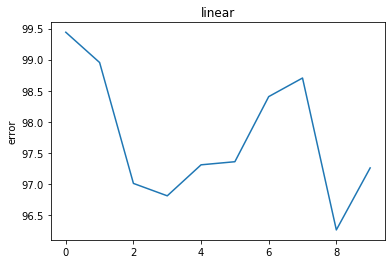

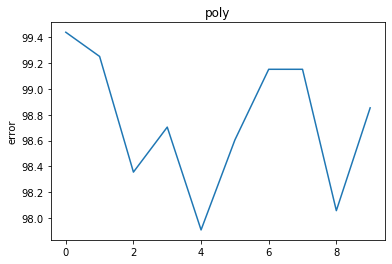

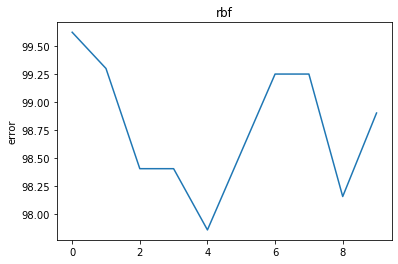

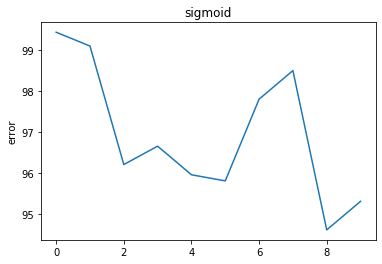

In [7]:
# Train and predict images by comparing the images one on all

# Decalre a dictionary to store the error data for 1 vs all
err_dat2 = {}
err_dat2['linear'] = []
err_dat2['poly'] = []
err_dat2['rbf'] = []
err_dat2['sigmoid'] = []    

num2 = -1
# Run SVM for all 1 vs all
for i in range(10):
    num1 = i
    # Call to only include data based on numbers that you want to compare
    inp = arrange(data,num1,num2,ranges)
    inpt = arrange(datat,num1,num2,rangest)
    for ker in ('linear', 'poly', 'rbf', 'sigmoid'):
        # Train data set
        clf = svm.SVC(kernel=ker, gamma='auto')
        clf.fit(inp[:,1:257],inp[:,0])

        # Predict training data
        rslt = clf.predict(inpt[:,1:257])

        # Compute Error
        err = 0
        for k in range(len(rslt)):
            if inpt[k,0] == rslt[k]:
                err = err + 1
        err = err/len(rslt)*100
        err_dat2[ker].append(err)
        
for ker in ('linear', 'poly', 'rbf', 'sigmoid'):
    print("median correct percentage for kernel " + ker + " = ", statistics.median(err_dat[ker]))
    print("mean correct percentage for kernel " + ker + " = ", statistics.mean(err_dat[ker]))

# Plot errors for 1 vs all comparison
for ker in ('linear', 'poly', 'rbf', 'sigmoid'):
    plt.plot(err_dat2[ker])
    plt.title(ker)
    plt.ylabel('error')
    plt.show()

In [8]:
# Reshape data for the CNN

# reshape training data
cdata = data[:,1:257].reshape(7291,16,16)
cdata_labels = data[:,0]
cdata = (cdata + 1) / 2 # scale data to be between 1 and 0

# reshape test data
cdatat = datat[:,1:257].reshape(2007,16,16)
cdatat_labels = datat[:,0]
cdatat = (cdatat + 1) / 2

# add a batch dimension
cdata, cdatat = cdata.reshape(-1,16,16,1), cdatat.reshape(-1,16,16,1)

In [39]:
# Create the model

model = models.Sequential()
model.add(layers.Conv2D(16, (2, 2), activation='relu', input_shape=(16, 16, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/20
228/228 [==============================] - 1s 6ms/step - loss: 0.8376 - accuracy: 0.7310 - val_loss: 0.4303 - val_accuracy: 0.8700
Epoch 2/20
228/228 [==============================] - 2s 7ms/step - loss: 0.2310 - accuracy: 0.9333 - val_loss: 0.3032 - val_accuracy: 0.9153
Epoch 3/20
228/228 [==============================] - 1s 7ms/step - loss: 0.1639 - accuracy: 0.9517 - val_loss: 0.2766 - val_accuracy: 0.9278
Epoch 4/20
228/228 [==============================] - 1s 5ms/step - loss: 0.1230 - accuracy: 0.9641 - val_loss: 0.2273 - val_accuracy: 0.9377
Epoch 5/20
228/228 [==============================] - 1s 5ms/step - loss: 0.0991 - accuracy: 0.9697 - val_loss: 0.2296 - val_accuracy: 0.9367
Epoch 6/20
228/228 [==============================] - 1s 5ms/step - loss: 0.0811 - accuracy: 0.9759 - val_loss: 0.1955 - val_accuracy: 0.9477
Epoch 7/20
228/228 [==============================] - 1s 5ms/step - loss: 0.0690 - accuracy: 0.9792 - val_loss: 0.2196 - val_accuracy: 0.9487
Epoch 

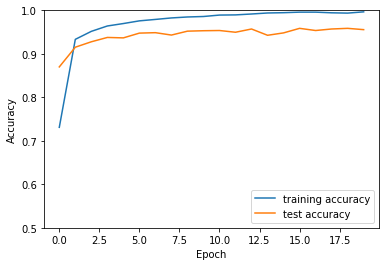

In [40]:
# Fit and test the model

visual = model.fit(cdata, cdata_labels, epochs=20, 
                    validation_data=(cdatat, cdatat_labels))

plt.plot(visual.history['accuracy'], label='training accuracy')
plt.plot(visual.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(cdatat,  cdatat_labels, verbose=2)

In [37]:
# Create the model using regularization

model = models.Sequential()
model.add(layers.Conv2D(16, (2, 2), activation='relu', input_shape=(16, 16, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/20
228/228 [==============================] - 1s 6ms/step - loss: 1.3261 - accuracy: 0.6903 - val_loss: 0.6977 - val_accuracy: 0.8625
Epoch 2/20
228/228 [==============================] - 1s 6ms/step - loss: 0.4762 - accuracy: 0.9220 - val_loss: 0.5605 - val_accuracy: 0.8894
Epoch 3/20
228/228 [==============================] - 1s 5ms/step - loss: 0.3447 - accuracy: 0.9476 - val_loss: 0.4184 - val_accuracy: 0.9258
Epoch 4/20
228/228 [==============================] - 1s 5ms/step - loss: 0.2702 - accuracy: 0.9610 - val_loss: 0.3721 - val_accuracy: 0.9312
Epoch 5/20
228/228 [==============================] - 1s 5ms/step - loss: 0.2211 - accuracy: 0.9667 - val_loss: 0.3314 - val_accuracy: 0.9362
Epoch 6/20
228/228 [==============================] - 1s 5ms/step - loss: 0.1925 - accuracy: 0.9665 - val_loss: 0.3257 - val_accuracy: 0.9342
Epoch 7/20
228/228 [==============================] - 1s 5ms/step - loss: 0.1671 - accuracy: 0.9738 - val_loss: 0.2769 - val_accuracy: 0.9447
Epoch 

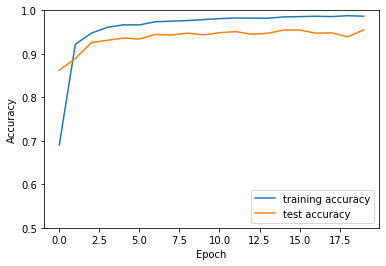

In [38]:
# Fit and test the model

visual = model.fit(cdata, cdata_labels, epochs=20, 
                    validation_data=(cdatat, cdatat_labels))

plt.plot(visual.history['accuracy'], label='training accuracy')
plt.plot(visual.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(cdatat,  cdatat_labels, verbose=2)

In [52]:
# Create the model using dropout

model = models.Sequential()
model.add(Dropout(0.2, input_shape=(16,16,1)))
model.add(layers.Conv2D(16, (2, 2), activation='relu', input_shape=(16, 16, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/20
228/228 [==============================] - 1s 6ms/step - loss: 1.1843 - accuracy: 0.7600 - val_loss: 0.7463 - val_accuracy: 0.8500
Epoch 2/20
228/228 [==============================] - 1s 6ms/step - loss: 0.5110 - accuracy: 0.9158 - val_loss: 0.5451 - val_accuracy: 0.9063
Epoch 3/20
228/228 [==============================] - 1s 5ms/step - loss: 0.3886 - accuracy: 0.9392 - val_loss: 0.4343 - val_accuracy: 0.9213
Epoch 4/20
228/228 [==============================] - 1s 5ms/step - loss: 0.3197 - accuracy: 0.9462 - val_loss: 0.4106 - val_accuracy: 0.9258
Epoch 5/20
228/228 [==============================] - 1s 6ms/step - loss: 0.2633 - accuracy: 0.9545 - val_loss: 0.3768 - val_accuracy: 0.9213
Epoch 6/20
228/228 [==============================] - 1s 5ms/step - loss: 0.2298 - accuracy: 0.9597 - val_loss: 0.3168 - val_accuracy: 0.9377
Epoch 7/20
228/228 [==============================] - 1s 5ms/step - loss: 0.1983 - accuracy: 0.9654 - val_loss: 0.3388 - val_accuracy: 0.9253
Epoch 

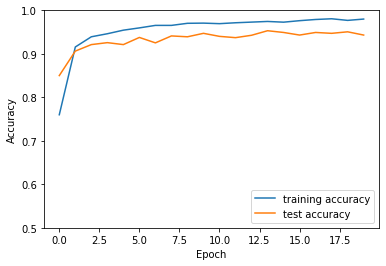

In [53]:
# Fit and test the model

visual = model.fit(cdata, cdata_labels, epochs=20, 
                    validation_data=(cdatat, cdatat_labels))

plt.plot(visual.history['accuracy'], label='training accuracy')
plt.plot(visual.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(cdatat,  cdatat_labels, verbose=2)

(7291, 257)


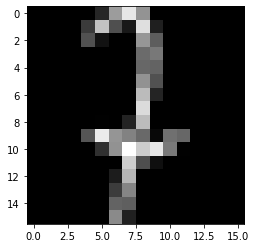

The number is -1


In [38]:
lot_im(data[5500,1:257],-1)